In [1]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random

In [2]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def graph(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    points = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i])
        if color == 1:
            points.append((X[i],Y[i])) 
        
    x_points = []
    y_points = []
    for i in points: 
        x_points.append(i[0])
        y_points.append(i[1])
        
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()
    
def view_window(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)

    points = []
    for pixel in pixels:
        color = image_function(pixel[0],pixel[1])
        if color == 1:
            points.append(pixel)
    
    x_points = []
    y_points = []
    for pixel in points:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()

In [3]:
def sincos(x,y):
    return sin(2 * x + y) * cos(y)

In [24]:
def graph(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
def view_window(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

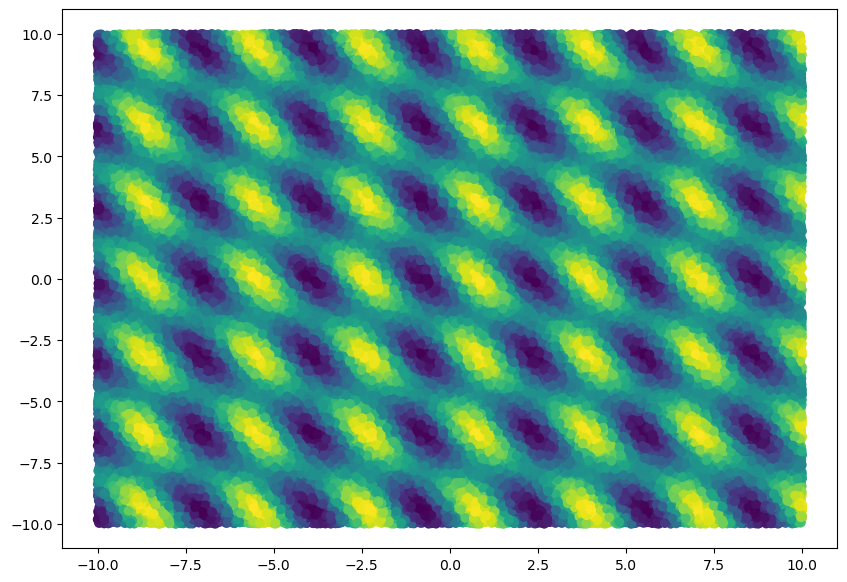

In [5]:
graph(sincos, 10, 10, x_random = True, n_samples= 100000, y_random = True)

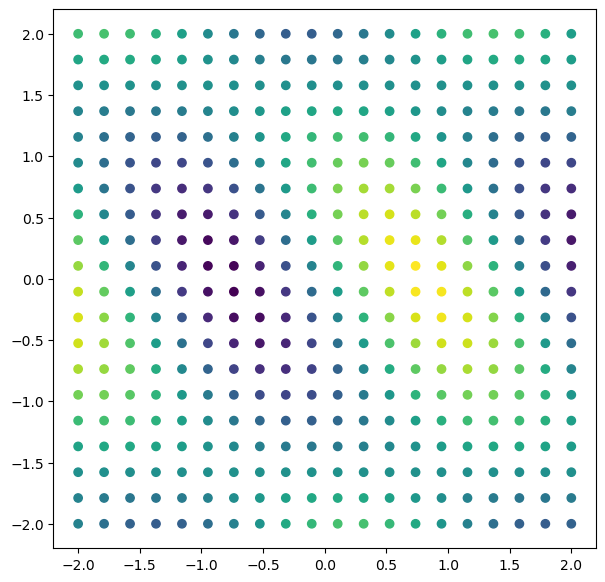

In [26]:
view_window(sincos, 20, 4)

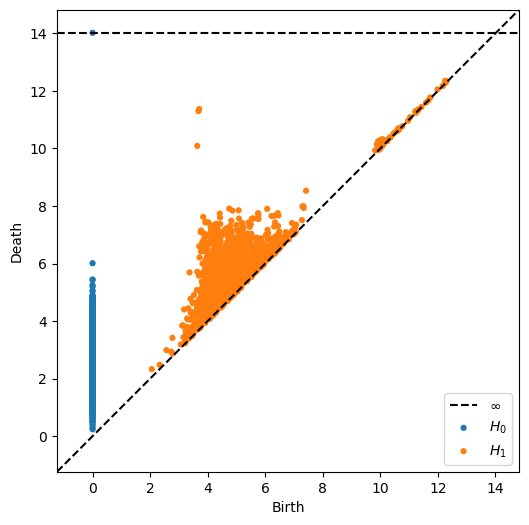

In [6]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 2000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

In [8]:
persistent_H1_intervals(output)

[7.665056467056274,
 7.614820957183838,
 6.448309898376465,
 3.7734153270721436,
 3.5135107040405273,
 3.5028040409088135,
 3.3973755836486816,
 3.374802827835083,
 3.3366103172302246,
 3.3179869651794434,
 3.200984477996826,
 3.183262348175049,
 3.168032646179199,
 3.160816192626953,
 3.134774684906006,
 3.126891613006592,
 3.092534065246582,
 3.0773472785949707,
 3.0573625564575195,
 3.052198648452759,
 3.028075695037842,
 3.0123794078826904,
 2.9767508506774902,
 2.952922821044922,
 2.9470198154449463,
 2.935737133026123,
 2.9262232780456543,
 2.8947911262512207,
 2.8870909214019775,
 2.879796028137207,
 2.8758373260498047,
 2.856579542160034,
 2.8548240661621094,
 2.842228889465332,
 2.835330009460449,
 2.8092379570007324,
 2.781041145324707,
 2.7715916633605957,
 2.757929801940918,
 2.7463483810424805,
 2.721757411956787,
 2.7107901573181152,
 2.6936330795288086,
 2.6933798789978027,
 2.6749820709228516,
 2.6700263023376465,
 2.663483142852783,
 2.648691177368164,
 2.6483390331268

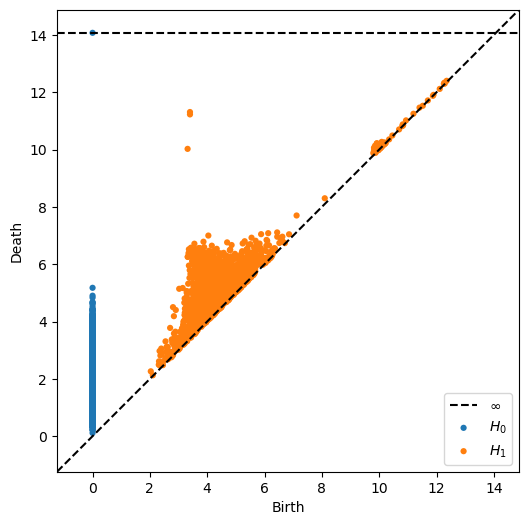

In [9]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

In [10]:
persistent_H1_intervals(output)

[7.9095258712768555,
 7.826118469238281,
 6.70713996887207,
 3.1625125408172607,
 3.159966230392456,
 3.144031047821045,
 3.0639264583587646,
 3.0373048782348633,
 3.0181570053100586,
 2.9595208168029785,
 2.9574403762817383,
 2.939638376235962,
 2.9334464073181152,
 2.9309794902801514,
 2.9238297939300537,
 2.9155056476593018,
 2.9038968086242676,
 2.8806493282318115,
 2.8567378520965576,
 2.8381905555725098,
 2.8243093490600586,
 2.8231661319732666,
 2.8071086406707764,
 2.803043842315674,
 2.752350091934204,
 2.7479162216186523,
 2.719813346862793,
 2.713613510131836,
 2.700871467590332,
 2.699962615966797,
 2.6981849670410156,
 2.6892740726470947,
 2.639749765396118,
 2.627701997756958,
 2.623638391494751,
 2.622533082962036,
 2.6221344470977783,
 2.6134824752807617,
 2.612931728363037,
 2.6092405319213867,
 2.594331741333008,
 2.5907137393951416,
 2.5767693519592285,
 2.5715224742889404,
 2.5645461082458496,
 2.5454530715942383,
 2.5374374389648438,
 2.535886764526367,
 2.53525257